# Análisis de Datos de uso de Bicicletas 2023

#### Imports básicos y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('trips_2023.csv', index_col=0)

# Parseo la duracion a float, en minutos
df['duracion_recorrido'] = df['duracion_recorrido'].str.replace(',', '')
df['duracion_recorrido'] = df['duracion_recorrido'].astype(float)
df["duracion_recorrido"] = df["duracion_recorrido"].apply(lambda x: x / 60)

df.head()

,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
1,17910696BAEcobici,30.800000,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE
2,17600256BAEcobici,4.800000,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE
3,17255670BAEcobici,18.383333,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE
4,17996972BAEcobici,19.416667,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE
5,17148836BAEcobici,6.300000,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE


In [3]:
# to datetime
df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'])
df['fecha_destino_recorrido'] = pd.to_datetime(df['fecha_destino_recorrido'])


## Mapa de calor

### Análisis del mapa de calor
Estos dos mapas interactivos de origen y destino nos permiten ver la diferencia de uso de las estaciones. Son fáciles de ver y de interpretar para cualquier usuario, técnico o no.
Esto se nota más en las zonas más céntricas de la ciudad. Tomemos como ejemplo la estación de bicicletas de Constitución.

Mapa de calor de origen:

<img src="screenshots/constitucion_origen.png" alt="Texto alternativo" width="500">

Mapa de calor de destino:


<img src="screenshots/constitucion_destino.png" alt="Texto alternativo" width="500">

Podemos ver que hay muchos mas viajes registrados que **salen** de Constitución que los que **llegan**. Esto puede interesar al cliente, ya que da cuenta de los comportamientos de los usuarios de bicicletas de esa zona en particular, y puede ayudar a tomar decisiones sobre la cantidad de bicicletas que se necesitan en esa estación.




## Distribución de horarios

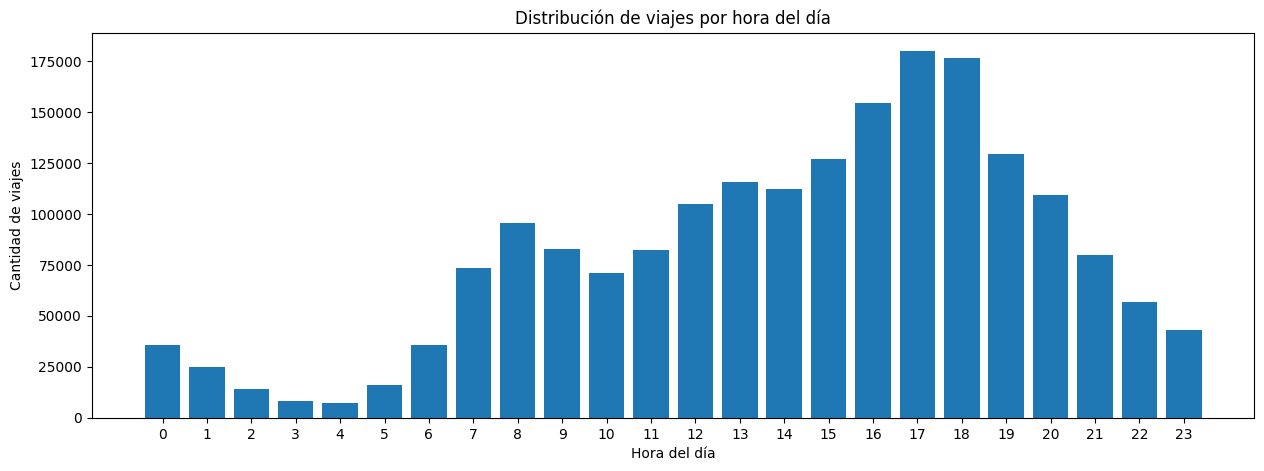

In [4]:
# Mostrar la distribución de las horas de inicio de los viajes
# mostrar todas las horas del día
horas = df['fecha_origen_recorrido'].dt.hour

# Calculate the frequency of trips for each hour
conteo_horas = horas.value_counts().sort_index()

# Create a bar plot for the distribution of trips by hour
plt.figure(figsize=(15, 5))
plt.bar(conteo_horas.index, conteo_horas.values)
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de viajes')
plt.title('Distribución de viajes por hora del día')
plt.xticks(conteo_horas.index)  # Set x-ticks to display all hours
plt.show()

Como podemos ver en el gráfico, la distribución de horarios de uso de las bicicletas está de acuerdo con nuestra intuición: alrededor de las horas de llegada y salida del trabajo, 8.00 y 17.00, hay dos picos de uso, con uno bastante más alto entre las 17 y las 19. 
Esto es interesante para el cliente, ya que puede ayudar a tomar decisiones sobre la cantidad de bicicletas que se necesitan en cada estación en cada momento del día.

## Distribución de uso en las estaciones del año.

Podemos analizar en qué estaciones del año se utilizan más las bicicletas. Uno esperaría que en verano se usen más que en invierno, y eso nos lo confirmarán los datos.

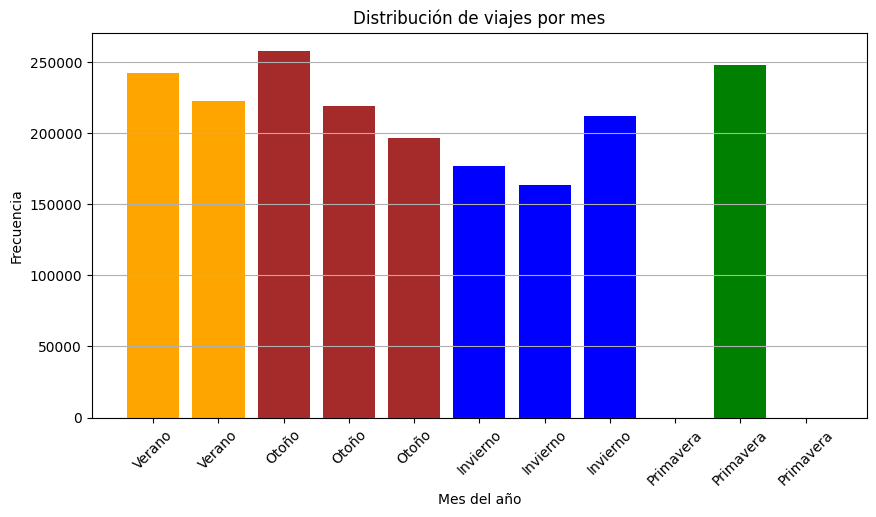

In [5]:
import matplotlib.pyplot as plt

meses = df["fecha_destino_recorrido"].dt.month
conteo_meses = meses.value_counts().sort_index()

estaciones = {
    1: 'Verano', 2: 'Verano', 3: 'Otoño',
    4: 'Otoño', 5: 'Otoño', 6: 'Invierno',
    7: 'Invierno', 8: 'Invierno', 9: 'Primavera',
    10: 'Primavera', 11: 'Primavera', 12: 'Verano'
}

# Crear una lista de estaciones correspondientes a cada número de mes
nombres_estaciones = [estaciones[m] for m in conteo_meses.index]

# Definir una paleta de colores para las estaciones
paleta_colores = {'Verano': 'orange', 'Otoño': 'brown', 'Invierno': 'blue', 'Primavera': 'green'}

# Crear el gráfico de barras con colores diferentes para cada estación
plt.figure(figsize=(10, 5))
barras = plt.bar(range(len(conteo_meses)), conteo_meses, width=0.8, color=[paleta_colores[estacion] for estacion in nombres_estaciones])

plt.xlabel('Mes del año')
plt.ylabel('Frecuencia')
plt.title('Distribución de viajes por mes')

# Establecer los nombres de las estaciones en el eje x
plt.xticks(range(len(conteo_meses)), nombres_estaciones, rotation=45)  # Establecer los nombres de las estaciones y rotarlos

plt.grid(axis='y') 

etiquetas = [f'{estacion} ({conteo})' for estacion, conteo in zip(nombres_estaciones, conteo_meses)]

plt.show()


Como podemos observar, en invierno el uso cae bastante, y a medida que aumentan las temperaturas vuelve a subir. Algo importante que notar es que aún no hay datos de diciembre de este año puesto que apenas empezó, ni tampoco de noviembre pues acaba de terminar y los datos se deben estar cargando aún y serán publicados pronto. Otra nota es que no hay datos de uso de septiembre en este dataset, por alguna razón que se desconoce.

## Fechas interesantes
Un ejemplo de una fecha importante para analizar es la fecha de las elecciones generales. Como medida para fomentar que la población vaya a votar, el gobierno de la ciudad de Buenos Aires decidió que el uso de las bicicletas sea gratuito ese día. Analicemos el uso de los domingos previos en relación al domingo de las elecciones (22/10/2023). Podemos ver un artículo periodístico que da cuenta de esta información [aquí](https://www.ambito.com/informacion-general/elecciones-2023-colectivo-tren-subte-y-ecobici-gratis-ir-votar-este-domingo-n5851237)


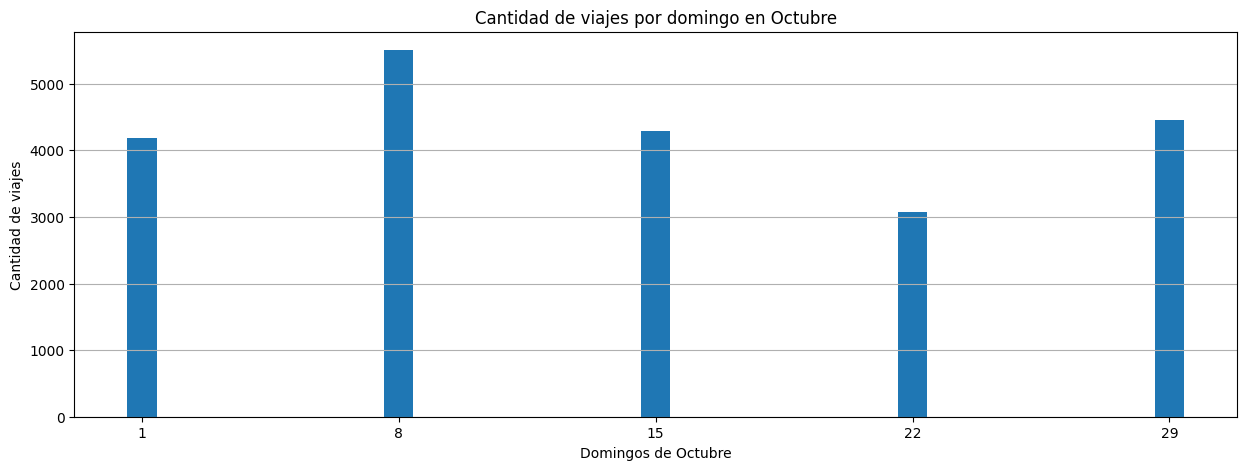

In [6]:
uso_domingos_octubre = df[(df['fecha_origen_recorrido'].dt.month == 10) & (df['fecha_origen_recorrido'].dt.dayofweek == 6)]

fechas_domingos = [1,8,15,22,29]

# grafico
plt.figure(figsize=(15, 5))
plt.bar(fechas_domingos, uso_domingos_octubre.groupby(uso_domingos_octubre['fecha_origen_recorrido'].dt.day).size())
plt.xlabel('Domingos de Octubre')
plt.ylabel('Cantidad de viajes')
plt.title('Cantidad de viajes por domingo en Octubre')

plt.xticks(fechas_domingos)
plt.grid(axis='y')
plt.show()


Como podemos ver, el uso del 22 de octubre es el menor de todos los domingos de octubre. Esto nos indica que la gente las usó menos ese día comparado con los otros domingos. 
Aquí vemos un informe meteorológico de los últimos 15 días de octubre, para certificar que no haya llovido justo ese día y que altere el análisis. Fuente: [MeteoBlue](https://www.meteoblue.com/es/tiempo/historyclimate/weatherarchive/buenos-aires_argentina_3435910?fcstlength=15&year=2023&month=10)

<img src="screenshots/datos_precipitaciones_ultimos_dias_octubre.png" alt="info_meteorologica" width="500">


También sería interesante hacer lo mismo con otras fechas en las que se realizó la misma medida, como por ejemplo en la segunda vuelta de las elecciones, pero todavía no se han publicado los datos de noviembre de 2023. 
Agregando a la lista de fechas importantes, los recitales de movilización masiva, como los de Taylor Swift en River. Podemos analizar también fechas de ese estilo para ver si la gente prefirió usar las bicicletas para ir a los recitales en vez de usar el transporte público o el auto, para evitar el tráfico y/o tener que estacionar por esa zona.

## Estaciones menos usadas
El análisis de las estaciones menos usadas puede ser útil para evaluar si podría ser beneficioso cerrarlas o moverlas a otro lugar, ya que quizás acumulan bicicletas que nunca son usadas y podrían ser mejor aprovechadas en otras estaciones.

In [7]:
# Estaciones menos usadas
estaciones_origen = df['nombre_estacion_origen'].value_counts()
estaciones_destino = df['nombre_estacion_destino'].value_counts()

# El análisis es con las estaciones de origen, también se puede extender a las estaciones de destino.
# Mostrar valores útiles para tener en cuenta usos máximos y mínimos
print("Mediana de viajes por estación de origen:", estaciones_origen.median())
print("Q1 de viajes por estación de origen:", estaciones_origen.quantile(0.25))
print("Q3 de viajes por estación de origen:", estaciones_origen.quantile(0.75))


Mediana de viajes por estación de origen: 4425.0
Q1 de viajes por estación de origen: 2173.5
Q3 de viajes por estación de origen: 7814.5


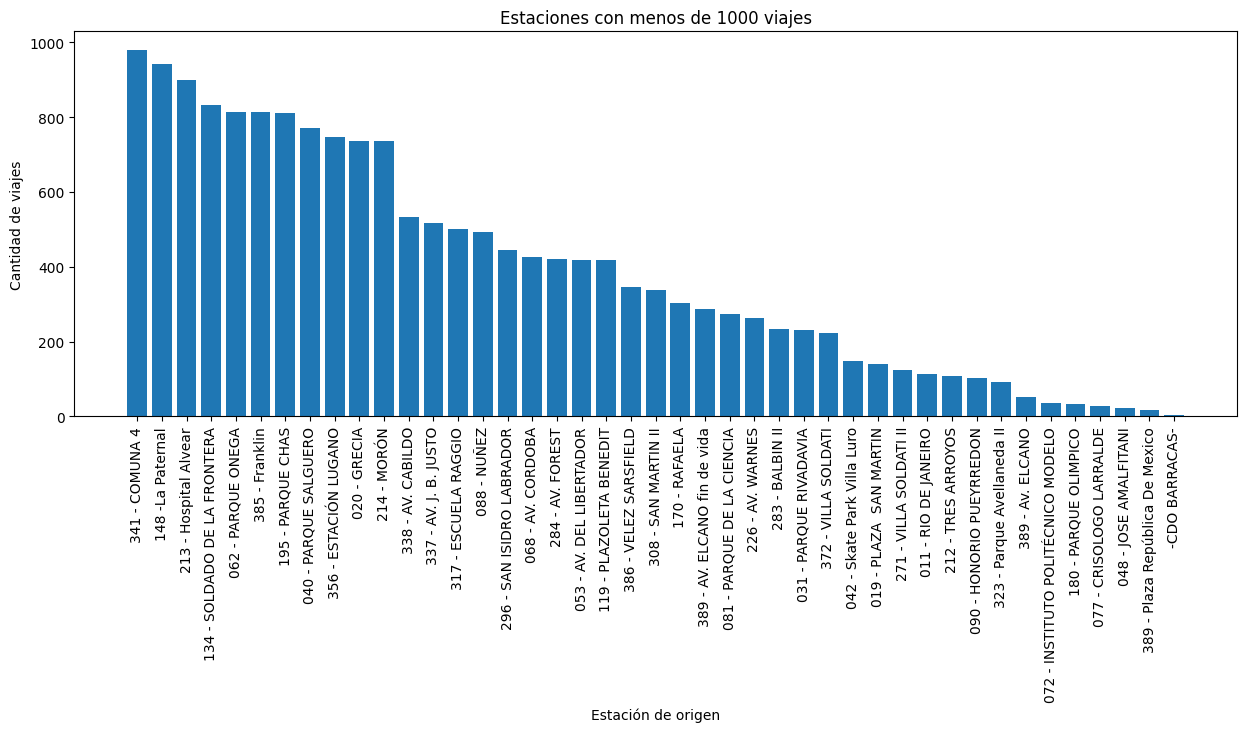

In [8]:
# Mostrar las estaciones con menos de 1000 viajes
estaciones_menos_usadas = estaciones_origen[estaciones_origen < 1000]

# Mostrar las estaciones con menos de 1000 viajes en un gráfico de barras
plt.figure(figsize=(15, 5))
plt.bar(estaciones_menos_usadas.index, estaciones_menos_usadas)
plt.xlabel('Estación de origen')
plt.ylabel('Cantidad de viajes')
plt.title('Estaciones con menos de 1000 viajes')
plt.xticks(rotation=90)
plt.show()


## Duracion viajes 

In [18]:
# Mostrar los 10 viajes más largos
# Ordenar los viajes por duración de recorrido de mayor a menor
viajes_largos = df.sort_values(by='duracion_recorrido', ascending=False)
viajes_largos.iloc[4000]

Id_recorrido                         18296266BAEcobici
duracion_recorrido                          260.583333
fecha_origen_recorrido             2023-06-07 22:52:05
id_estacion_origen                        384BAEcobici
nombre_estacion_origen        267 - Plaza 25 De Agosto
direccion_estacion_origen          14 de julio de 1194
long_estacion_origen                        -58.461835
lat_estacion_origen                         -34.579519
fecha_destino_recorrido            2023-06-08 03:12:40
id_estacion_destino                       443BAEcobici
nombre_estacion_destino                 -CDO BARRACAS-
direccion_estacion_destino              LAFAYETTE 1730
long_estacion_destino                       -58.390287
lat_estacion_destino                        -34.654474
id_usuario                             885870BAEcobici
modelo_bicicleta                                   FIT
género                                           OTHER
Name: 1010076, dtype: object

Como podemos ver, hay muchos casos de outliers en este dataset. Esto se debe a que hay viajes que duran más de 24 horas, lo cual es imposible. Esto puede deberse a que:
- la devolvió mal y el sistema no lo registró
- el usuario se olvidó de devolverla y la devolvió más tarde.

Observemos en detenimiento los viajes que duran más de 24 horas. Analicemos el sexo del usuario, para ver si hay alguna diferencia entre hombres y mujeres en estos outliers.

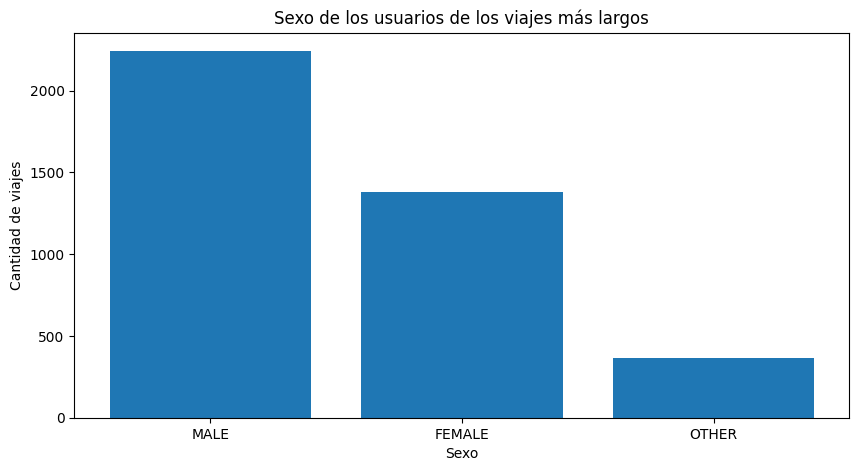

In [21]:
# Tomamos los primeros 4000 casos como los outliers.
outliers = viajes_largos.iloc[:4000]

# graficar el sexo de los usuarios de los outliers
plt.figure(figsize=(10, 5))
plt.bar(outliers['género'].value_counts().index, outliers['género'].value_counts())
plt.xlabel('Sexo')
plt.ylabel('Cantidad de viajes')
plt.title('Sexo de los usuarios de los viajes más largos')
plt.show()

Me voy por la tangente un rato. Cuál es el comportamiento de los usuarios con género OTHER?

In [27]:
other = df[df["género"] == "OTHER"]
print("Porcentaje de usuarios únicos con género OTHER:", len(other["id_usuario"].unique()) / len(df["id_usuario"].unique()) * 100, "%")
print("Cantidad de viajes de usuarios con género OTHER:", len(other))
print("Duracion minima de viajes:", other["duracion_recorrido"].min())
print("Duracion mediana de viajes:", other["duracion_recorrido"].median())
print("Duracion maxima de viajes:", other["duracion_recorrido"].max())
other.head()


Porcentaje de usuarios únicos con género OTHER: 10.076559268625678 %
Cantidad de viajes de usuarios con género OTHER: 177477
Duracion minima de viajes: 1.0166666666666666
Duracion mediana de viajes: 16.366666666666667
Duracion maxima de viajes: 39329.9


,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
12,17443342BAEcobici,17.800000,2023-03-07 16:51:14,128BAEcobici,128 - PARQUE DEL BAJO,Tte. Gral. Juan Domingo Perón 133,-58.368821,-34.605152,2023-03-07 17:09:02,73BAEcobici,073 - Ruy Díaz de Guzmán,Avenida Martin Garcia y Ruy Díaz de Guzmán,-58.371823,-34.630681,344641BAEcobici,ICONIC,OTHER
49,18952397BAEcobici,12.000000,2023-08-30 18:30:48,190BAEcobici,190 - JUNCAL,"Juncal & Salguero, Jeronimo",-58.411114,-34.585076,2023-08-30 18:42:48,515BAEcobici,294 - PLAZOLETA RÍO DE LA PLATA,Av. Sarmiento 500,-58.412844,-34.572204,670405BAEcobici,ICONIC,OTHER
51,18151938BAEcobici,29.566667,2023-05-19 11:19:26,116BAEcobici,116 - HOSPITAL ALEMÁN,Beruti & Ecuador,-58.402589,-34.592171,2023-05-19 11:49:00,210BAEcobici,335 - General Urquiza,Figueroa Alcorta & Sarmiento,-58.411278,-34.572165,516967BAEcobici,ICONIC,OTHER
53,17785830BAEcobici,27.683333,2023-04-11 11:40:26,206BAEcobici,159 - Fitz Roy & Gorriti,Fitz Roy & Gorriti,-58.437339,-34.584950,2023-04-11 12:08:07,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,976602BAEcobici,ICONIC,OTHER
66,17425605BAEcobici,20.883333,2023-03-06 09:06:51,307BAEcobici,341 - COMUNA 4,AV PERITO MORENO 2881,-58.424773,-34.649997,2023-03-06 09:27:44,252BAEcobici,331 - CALIFORNIA,California 1774 y General Hornos,-58.374336,-34.647121,905758BAEcobici,ICONIC,OTHER


In [10]:
# Mostrar valores útiles para tener en cuenta usos máximos y mínimos
print("Mediana de duración de viajes:", round(df["duracion_recorrido"].median(), 2))
print("Q1 de duración de viajes:", df["duracion_recorrido"].quantile(0.25))
print("Q3 de duración de viajes:", round(df["duracion_recorrido"].quantile(0.75), 2))

# Qué porcentaje de viajes son más largos que 30 minutos?
print("Porcentaje de viajes más largos que 30 minutos:", round(df[df["duracion_recorrido"] > 30].shape[0] / df.shape[0] * 100, 2), "%")


Mediana de duración de viajes: 15.52
Q1 de duración de viajes: 9.55
Q3 de duración de viajes: 25.03
Porcentaje de viajes más largos que 30 minutos: 17.0 %


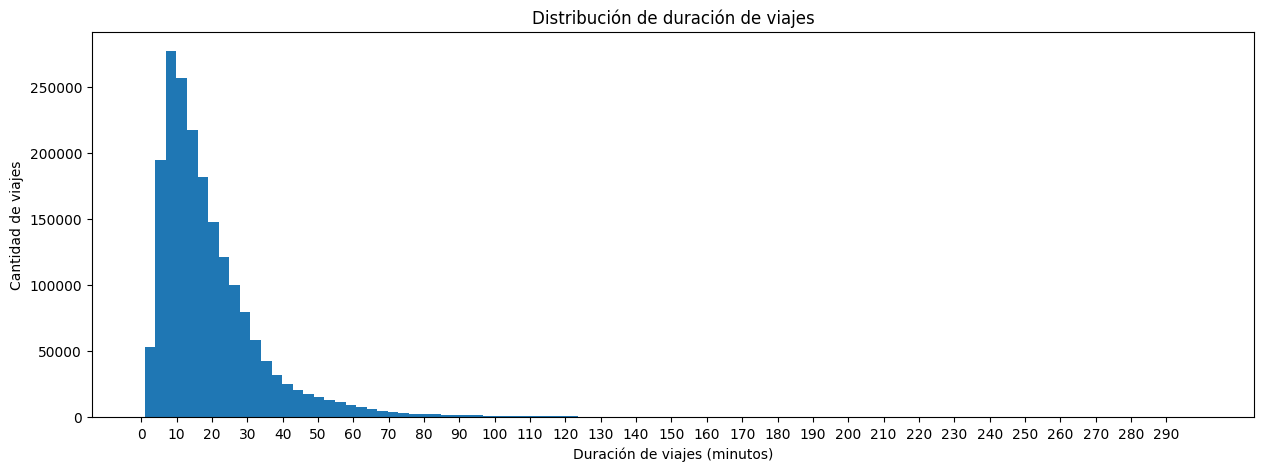

In [33]:
# Gráfico de la distribución de duraciones de viajes
# Duraciones de viajes entre 0 y 600 minutos para filtrar outliers
duraciones_filtradas = df[(df['duracion_recorrido'] > 0) & (df['duracion_recorrido'] < 300)]['duracion_recorrido']

plt.figure(figsize=(15, 5))
plt.hist(duraciones_filtradas, bins=100)
plt.xlabel('Duración de viajes (minutos)')
plt.ylabel('Cantidad de viajes')
plt.xticks(range(0, 300, 10))
plt.title('Distribución de duración de viajes')
plt.show()

Finalmente, podemos ver que la gran mayoría de viajes se ubica entre los 0 y los 60 minutos. Esto es de interés para el cliente para tener en cuenta el comportamiento de los usuarios. 

Por ejemplo, si en el futuro se fuesen a implementar bicicletas eléctricas, esto da una idea de la autonomía que deberían tener para que los usuarios puedan usarlas por el tiempo que necesiten, y que mientras no estén en uso se puedan cargar.

Nota: no pude terminar con este mapa. No logré que cargue, quizás hay algún problema con la cantidad de datos. Dejo el código comentado a continuación.

In [12]:
'''

latitudes = df[df['nombre_estacion_origen'].isin(estaciones_menos_usadas.index)]['lat_estacion_origen']
longitudes = df[df['nombre_estacion_origen'].isin(estaciones_menos_usadas.index)]['long_estacion_origen']

# elimina valores faltantes
latitudes = latitudes.dropna()  
longitudes = longitudes.dropna()  

# Centro del mapa en ciudad de buenos aires
centro_mapa = [-34.603722, -58.381592]

mapa = folium.Map(location=centro_mapa, zoom_start=12)

# Iterar a través de los datos para agregar marcadores al mapa
for index, row in df.iterrows():
    if row['nombre_estacion_origen'] in estaciones_menos_usadas.index:
        folium.Marker(location=[row['lat_estacion_origen'], row['long_estacion_origen']]).add_to(mapa)

mapa.save("estaciones_menos_usadas.html")
mapa
'''

'\n\nlatitudes = df[df[\'nombre_estacion_origen\'].isin(estaciones_menos_usadas.index)][\'lat_estacion_origen\']\nlongitudes = df[df[\'nombre_estacion_origen\'].isin(estaciones_menos_usadas.index)][\'long_estacion_origen\']\n\n# elimina valores faltantes\nlatitudes = latitudes.dropna()  \nlongitudes = longitudes.dropna()  \n\n# Centro del mapa en ciudad de buenos aires\ncentro_mapa = [-34.603722, -58.381592]\n\nmapa = folium.Map(location=centro_mapa, zoom_start=12)\n\n# Iterar a través de los datos para agregar marcadores al mapa\nfor index, row in df.iterrows():\n    if row[\'nombre_estacion_origen\'] in estaciones_menos_usadas.index:\n        folium.Marker(location=[row[\'lat_estacion_origen\'], row[\'long_estacion_origen\']]).add_to(mapa)\n\nmapa.save("estaciones_menos_usadas.html")\nmapa\n'